In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg


In [62]:
df = pd.read_excel(r"C:\Users\91955\Desktop\time series model\Book1.xlsx", index_col=0, parse_dates=True, engine='openpyxl')
x=df.values

In [63]:
print('shape of data \t',df.shape)
print('original dataset: \n',df.head())
print('after extracting only temperature: \n',x)

shape of data 	 (50, 1)
original dataset: 
             Temp
Dates           
1981-01-01  16.0
1981-01-02  15.0
1981-01-03  17.0
1981-01-04  23.4
1981-01-05  25.0
after extracting only temperature: 
 [[16. ]
 [15. ]
 [17. ]
 [23.4]
 [25. ]
 [26. ]
 [27. ]
 [28. ]
 [29. ]
 [31. ]
 [31. ]
 [34. ]
 [26. ]
 [14.6]
 [16.7]
 [16.8]
 [16.4]
 [17. ]
 [15. ]
 [15.6]
 [15.6]
 [15.2]
 [14. ]
 [16. ]
 [15.9]
 [18.6]
 [13.4]
 [13.7]
 [16.5]
 [13.6]
 [15.4]
 [14.5]
 [12.4]
 [14.4]
 [14.5]
 [17.5]
 [18.5]
 [16.7]
 [14.6]
 [16.7]
 [18.7]
 [16.7]
 [17. ]
 [19. ]
 [21.3]
 [12.2]
 [13.5]
 [16.7]
 [15.6]
 [17.7]]


<Axes: xlabel='Dates'>

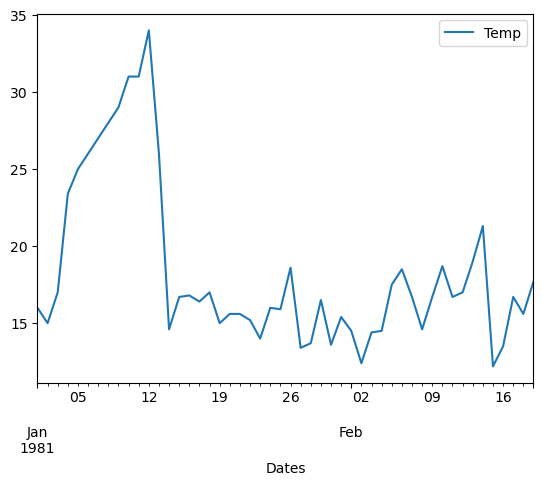

In [64]:
df.plot()

In [65]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['Temp'], autolag='AIC')

print("1. ADF :",dftest[0])
print("2. P-value",dftest[1])
print("3. Num of lags",dftest[2])
print("4. Num of observation used for ADF regression and critical values calculation:",dftest[3])
print("5. Critical value:")
for key,val in dftest[4].items():
    print("\t",key,":",val)

1. ADF : -2.1086916625764327
2. P-value 0.24103403385184385
3. Num of lags 0
4. Num of observation used for ADF regression and critical values calculation: 49
5. Critical value:
	 1% : -3.5714715250448363
	 5% : -2.922629480573571
	 10% : -2.5993358475635153


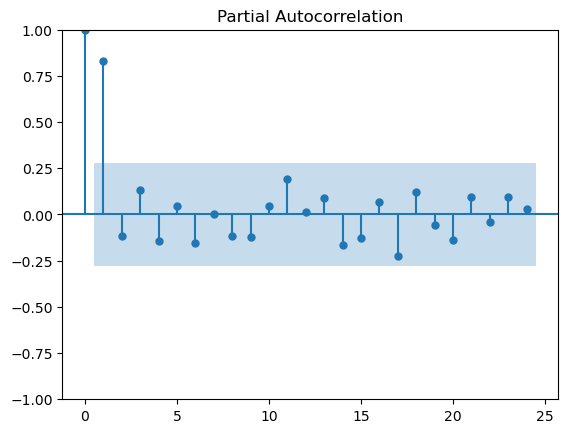

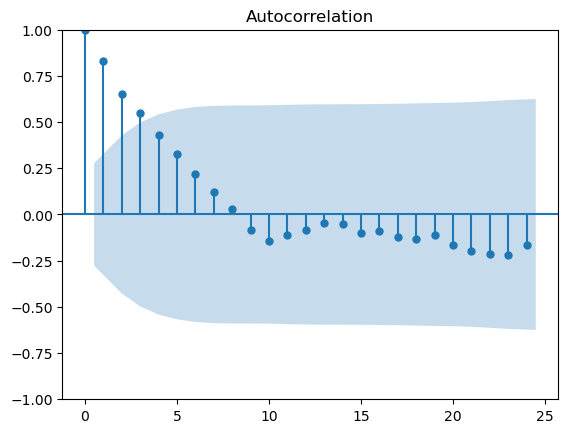

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['Temp'],lags=24)
acf = plot_acf(df['Temp'],lags=24)

In [81]:
train=x[:len(x)-7]
test=x[:len(x)-7:]

In [82]:
model = AutoReg(train,lags=4).fit()

In [83]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   43
Model:                     AutoReg(4)   Log Likelihood                 -93.893
Method:               Conditional MLE   S.D. of innovations              2.687
Date:                Wed, 17 Jan 2024   AIC                            199.786
Time:                        12:05:08   BIC                            209.767
Sample:                             4   HQIC                           203.367
                                   43                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9062      1.636      1.777      0.076      -0.300       6.112
y.L1           1.0192      0.149      6.821      0.000       0.726       1.312
y.L2          -0.2632      0.215     -1.223      0.2

In [84]:
print(len(train))

43


In [85]:
pred=model.predict(start=len(train), end=len(x)-1,dynamic=False)

[17.68617118 17.49530445 17.51738174 17.70862919 17.74004919 17.75805084
 17.81113432]


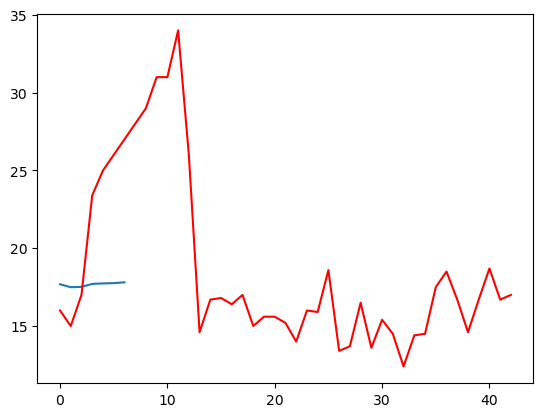

In [86]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color='red')
print(pred)

In [95]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming test and pred are your arrays
num_lags = 7

if len(test) >= num_lags and len(pred) >= num_lags:
    rmse = sqrt(mean_squared_error(test[:num_lags], pred[:num_lags]))
    print(f"RMSE for the first {num_lags} lags:", rmse)
else:
    print("Error: Insufficient data for calculating RMSE for the first {num_lags} lags.")


RMSE for the first 7 lags: 5.93778418626901


In [96]:
pred_future= model.predict(start=len(x)+1,end=len(x)+7,dynamic=False)
print(pred_future)

[17.84900705 17.86424552 17.87439501 17.87939725 17.88361614 17.88660222
 17.88810893]
